# MLflow Tracking

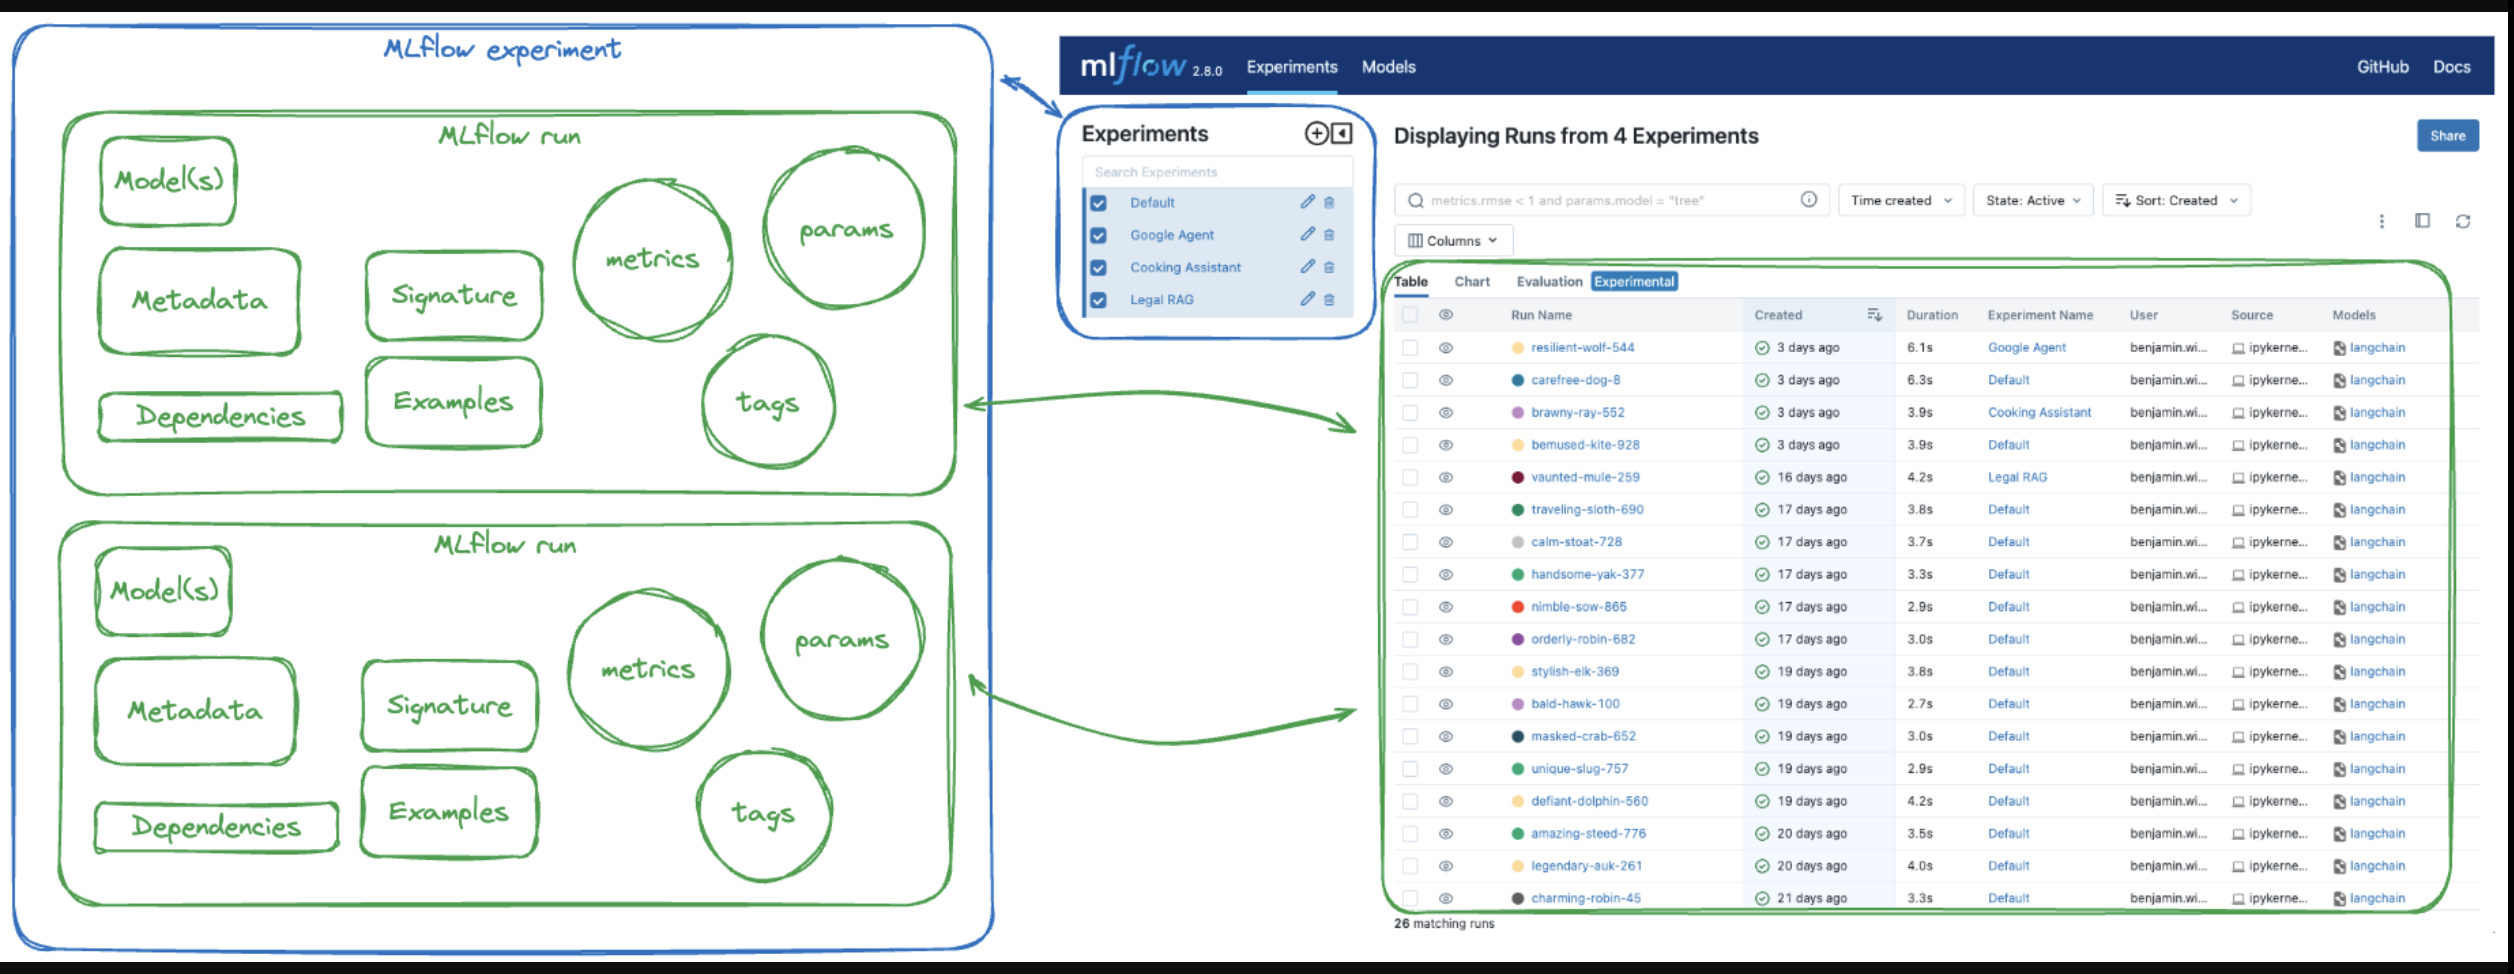

**`Workflow of Experiments and Runs`** within **MLflow**, a tool for managing the lifecycle of machine learning (ML) projects.

## 1. **MLflow Experiment**
   - In MLflow, an **experiment** is a collection of ML **runs** that **track different models, parameters, and metrics** over time. Experiments help organize runs logically, such as by project, task, or version.
   
   - Each experiment can contain multiple **MLflow runs**, where each run logs different data related to a particular training session or model version.

## 2. **MLflow Run**
   - A **run** within an experiment logs all relevant details of a specific instance of training or testing a model. These logs include:
   
     - **Model(s)**: The trained model(s) from the run.

     - **Metadata**: Information about the run’s context, like the user or environment.
     - **Dependencies**: Libraries and package versions needed to reproduce the run.
     - **Signature**: Expected input and output types for the model.
     - **Examples**: Example inputs and outputs for the model to clarify its operation.
     - **Metrics**: Performance metrics like accuracy, loss, or RMSE.
     - **Parameters (params)**: Hyperparameters or other configurations used in the model training.
     - **Tags**: Custom labels for categorizing or describing the run.

## 3. **MLflow UI (Interface)**
   - The MLflow interface displays a dashboard where you can filter and view all experiments and runs. The UI supports:
   
     - **Experiment Selection**: You can select multiple experiments, as shown by the list on the left (Default, Google Agent, Cooking Assistant, Legal RAG).

     - **Search & Filters**: Query specific runs by conditions (e.g., metrics or parameters) to find experiments with desired properties.
     - **Runs Table**: Lists runs, showing details like run name, duration, experiment name, user, source, and models.

## 4. **Uses and Benefits**
   - **Tracking Experiment History**: MLflow enables tracking models' performance over time, making it easy to compare experiments and roll back to a previous version if needed.
   
   - **Reproducibility**: The logged information (parameters, dependencies, etc.) helps ensure that the same model can be reproduced.
   - **Deployment Readiness**: The model’s metadata, metrics, and signature are essential for deployment, providing all necessary context.

This structure helps ML teams efficiently organize and manage experiments, enabling better model version control and transparency.

# [MLflow Tracking Quickstart](https://mlflow.org/docs/latest/getting-started/intro-quickstart/index.html)

## Set the Tracking Server URI

**Note:** If this is not set within your notebook or runtime environment, the runs will be logged to your local file system.

In [2]:
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

## Train a model and prepare metadata for logging

* **Load** and **prepare** the Iris dataset for modeling.

* **Train** a **Logistic Regression** model and evaluate its performance.

* **Prepare** the **model hyperparameters** and **calculate metrics** for logging.

In [5]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
from mlflow.models.signature import ModelSignature

import pandas as pd
from numpy import ndarray
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model hyperparameters
params: dict[str, str | int] = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 42,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X=X_train, y=y_train)

# Predict on the test set
y_pred: ndarray = lr.predict(X=X_test)

# Calculate metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="macro")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="macro")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


/Users/admin/Library/Caches/pypoetry/virtualenvs/models-wPjj_xAa-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Log the model and its metadata to MLflow

Now, we’re going to use the **model** that we trained, the **hyperparameters** that we specified for the model’s fit, and the **loss metrics** that were calculated by evaluating the model’s performance on the test data to log to MLflow.

The steps that we will take are:

* Initiate an **MLflow run** context to start a new run that we will log the model and metadata to.

* **Log model parameters** and **performance metrics**.

* **Tag the run** for easy retrieval.

* **Register the model** in the MLflow Model Registry while logging (saving) the model.

In [7]:
# Set the tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment(experiment_name="MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params=params)

    # Log the loss metrics
    mlflow.log_metrics(
        metrics={
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
        }
    )

    # Set a tag that we can use to remind ourselves what the run was for
    mlflow.set_tag(
        key="Training Info", value="Basic Logistic Regression Model for Iris Data"
    )

    # Infer the Model Signature
    signature: ModelSignature = infer_signature(
        model_input=X_train, model_output=lr.predict(X=X_train)
    )

    # Log the Model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="iris_model-tracking-quickstart",
    )

2024/10/30 12:22:20 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Quickstart' does not exist. Creating a new experiment.
Successfully registered model 'iris_model-tracking-quickstart'.
2024/10/30 12:22:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris_model-tracking-quickstart, version 1
Created version '1' of model 'iris_model-tracking-quickstart'.
2024/10/30 12:22:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run invincible-mouse-223 at: http://127.0.0.1:8080/#/experiments/467294602406330757/runs/022ef35844b7441ea0ad68ef3fc2e57f.
2024/10/30 12:22:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/467294602406330757.


## Load the model as a Python Function (pyfunc) and use it for inference
After logging the model, we can perform inference by:

* **Loading** the model using MLflow’s **`pyfunc`** flavor.

* Running **Predict** on new data using the loaded model.

In [8]:
# Load the Model back for Predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris(return_X_y=False).feature_names

result = pd.DataFrame(data=X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

print(result[:4])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,predicted_class
0,6.1,2.8,4.7,1.2,1,1
1,5.7,3.8,1.7,0.3,0,0
2,7.7,2.6,6.9,2.3,2,2
3,6.0,2.9,4.5,1.5,1,1


## View the Run in the MLflow UI

In order to see the results of our run, we can navigate to the MLflow UI. Since we have already started the Tracking Server at [http://localhost:8080](http://localhost:8080), we can simply navigate to that URL in our browser.

When opening the site, you will see a screen similar to the following:

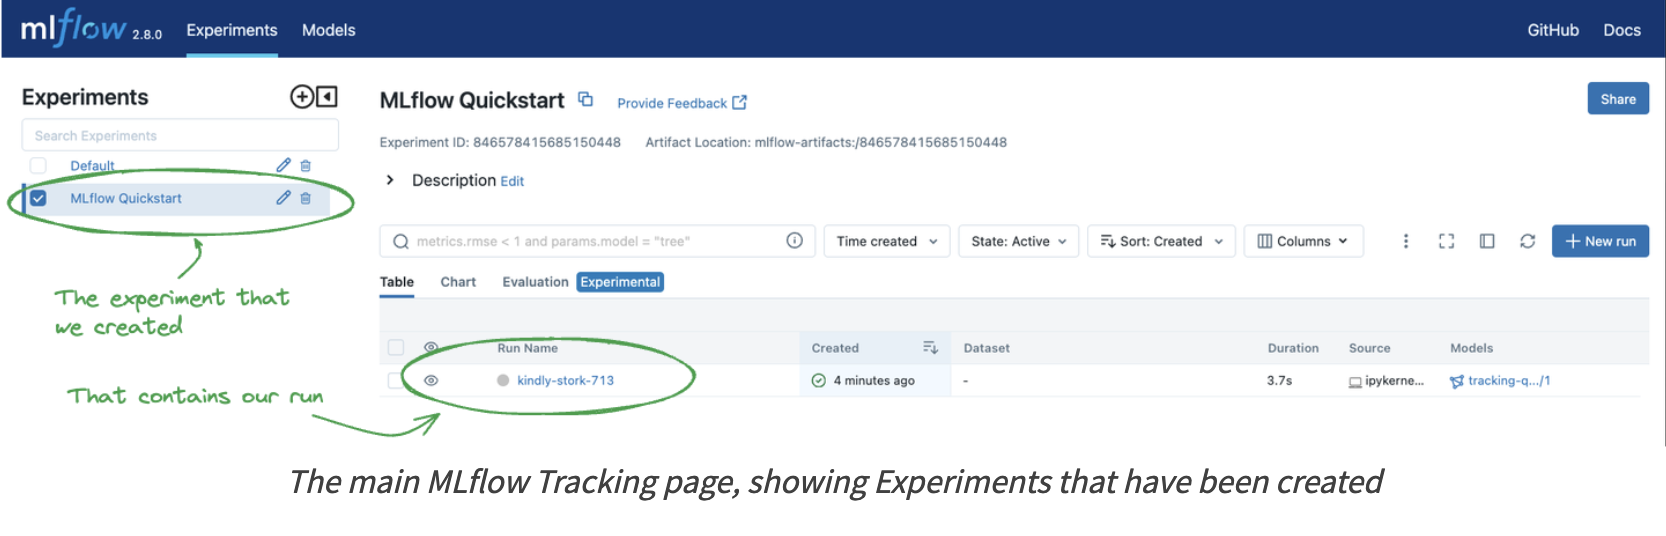

Clicking on the name of the Experiment that we created (“MLflow Quickstart”) will give us a list of runs associated with the Experiment. You should see a random name that has been generated for the run and nothing else show up in the Table list view to the right.

Clicking on the name of the run will take you to the Run page, where the details of what we’ve logged will be shown. The elements have been highlighted below to show how and where this data is recorded within the UI.

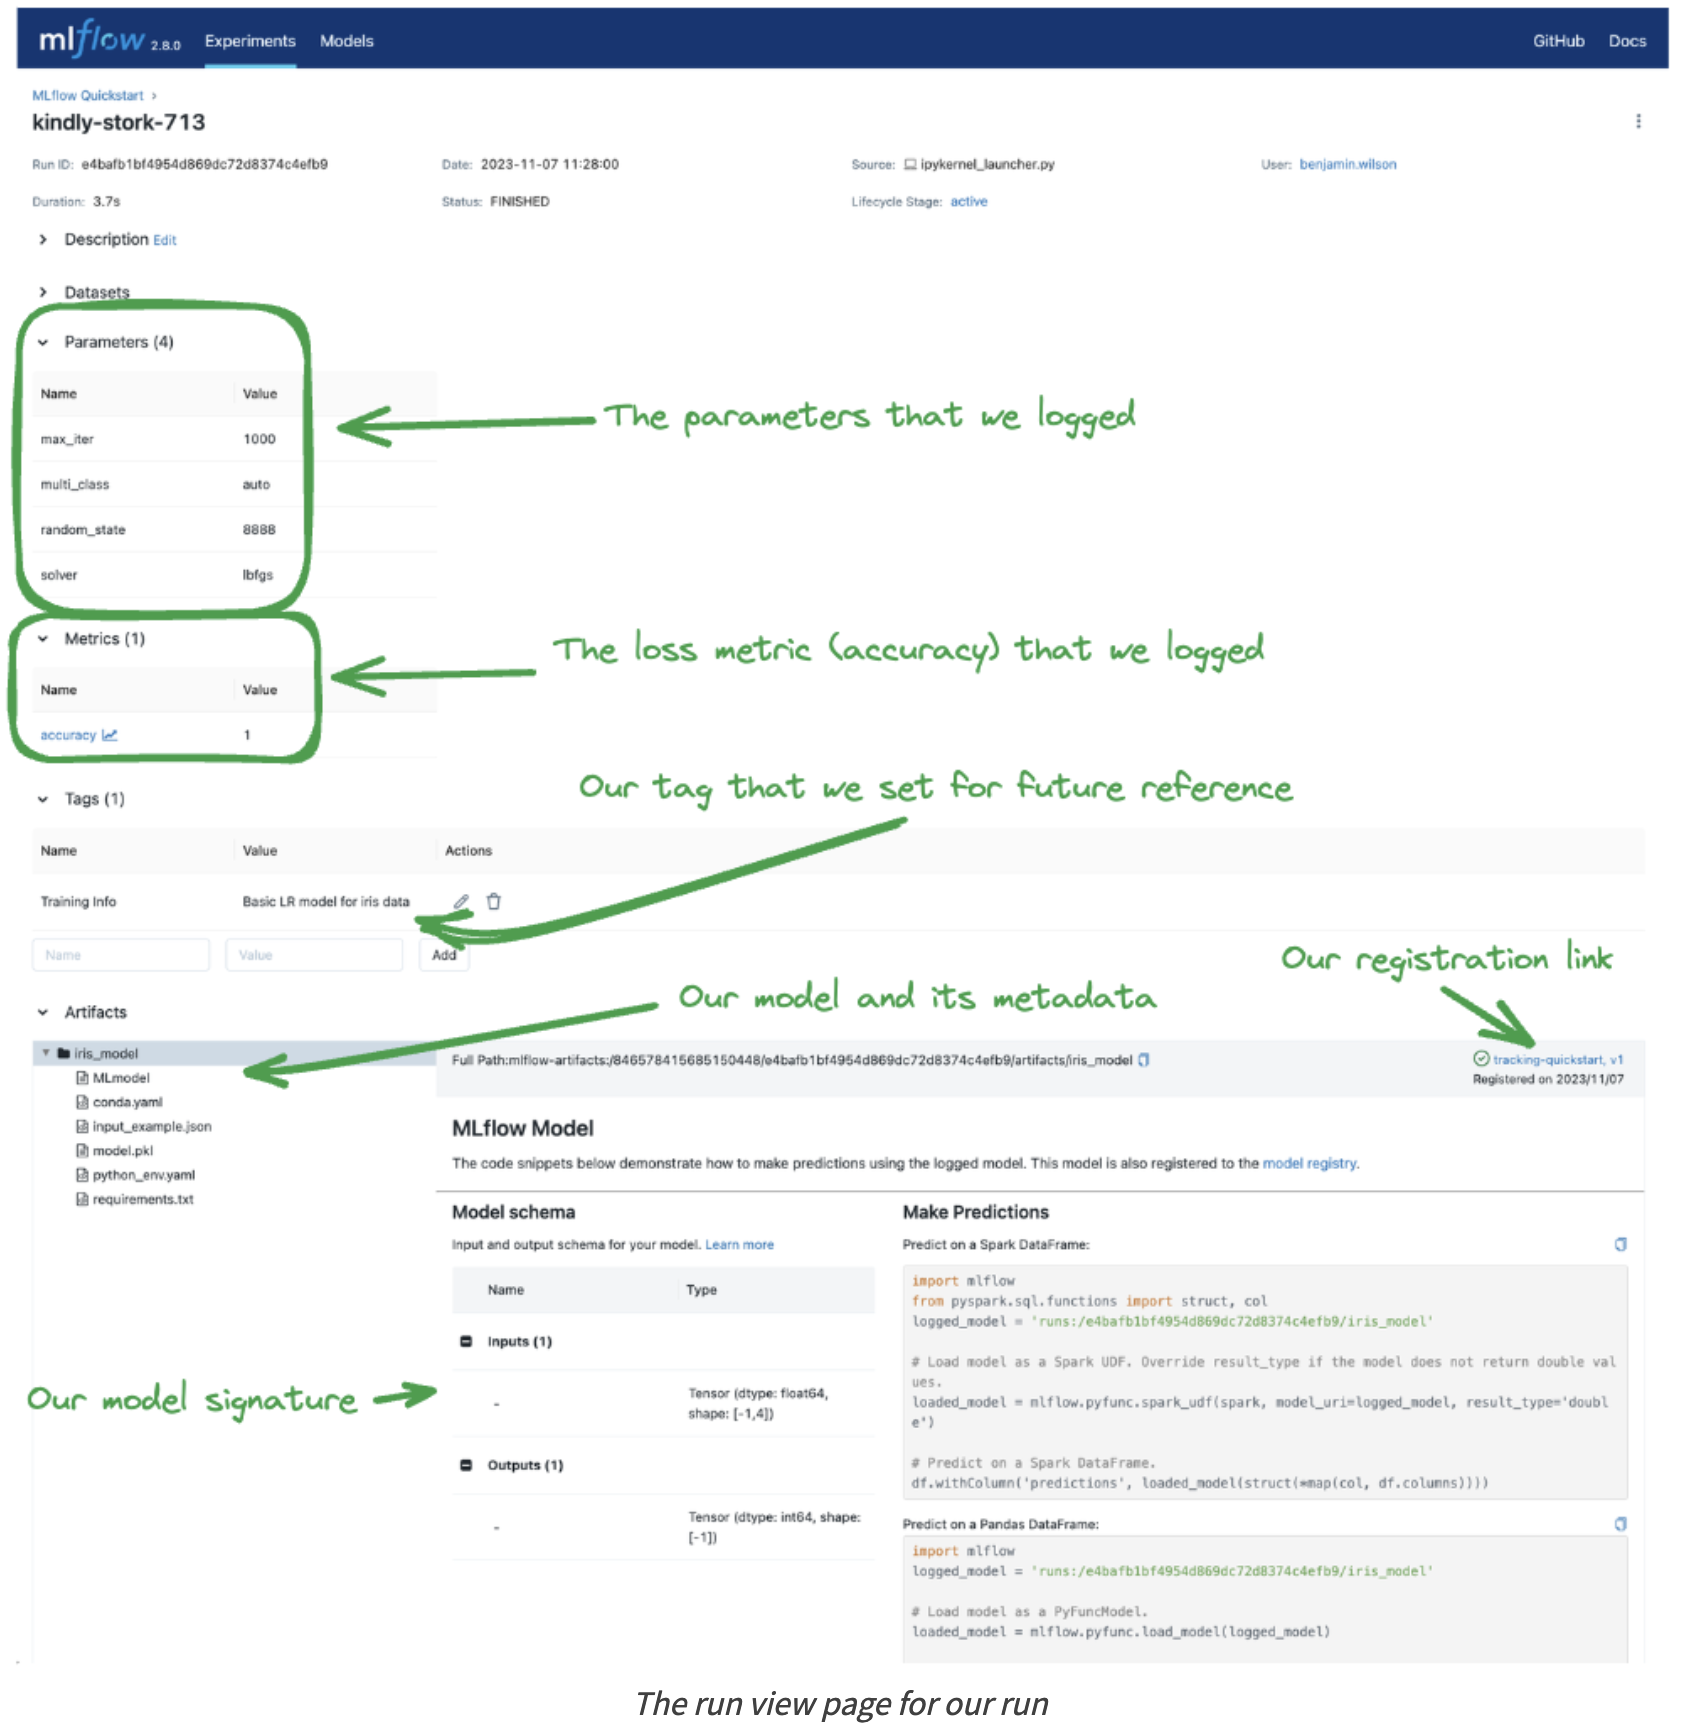

## Conclusion
Congratulations on working through the MLflow Tracking Quickstart! You should now have a basic understanding of how to use the MLflow Tracking API to log models.

If you are interested in a more in-depth tutorial, please see the [Getting Started with MLflow](https://mlflow.org/docs/latest/getting-started/logging-first-model/index.html) tutorial as a good next step in increasing your knowledge about MLflow!

# Entire Workflow

### Detailed Workflow and Rationale

1. **Importing Libraries**:
    ```python
    import mlflow
    import pandas as pd
    from mlflow.models import infer_signature
    from mlflow.models.signature import ModelSignature
    from numpy import ndarray
    from sklearn import datasets
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    from sklearn.model_selection import train_test_split
    ```
    **When**: At the start of your script.
    
    **Why**: To make necessary libraries available for use in the script.

2. **Loading the Dataset**:
    ```python
    # Load the Iris dataset
    X, y = datasets.load_iris(return_X_y=True)
    ```
    **When**: After importing libraries.
    
    **Why**: To have the data ready for preprocessing and model training.

3. **Splitting the Dataset**:
    ```python
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    ```
    **When**: Immediately after loading the dataset.
    
    **Why**: To separate the data into training and testing sets, which is crucial for evaluating the model's performance on unseen data.

4. **Defining Model Hyperparameters**:
    ```python
    # Define the model hyperparameters
    params: dict[str, str | int] = {
        "solver": "lbfgs",
        "max_iter": 1000,
        "multi_class": "auto",
        "random_state": 42,
    }
    ```
    **When**: Before initializing the model.
    
    **Why**: To configure the model with specific settings that might influence its performance.

5. **Training the Model**:
    ```python
    # Train the model
    lr = LogisticRegression(**params)
    lr.fit(X=X_train, y=y_train)
    ```
    **When**: After defining the hyperparameters.
    
    **Why**: To create and train the model using the training dataset.

6. **Making Predictions and Calculating Metrics**:
    ```python
    # Predict on the test set
    y_pred: ndarray = lr.predict(X=X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average="macro")
    recall = recall_score(y_true=y_test, y_pred=y_pred, average="macro")
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    ```
    **When**: Immediately after training the model.
    
    **Why**: To evaluate the model's performance on the test dataset using various metrics.

7. **Setting Up MLflow Tracking**:
    ```python
    # Set the tracking server uri for logging
    mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
    ```
    **When**: Before starting an MLflow run.
    
    **Why**: To configure MLflow to log data to a specified tracking server.

8. **Creating and Starting an MLflow Experiment**:
    ```python
    # Create a new MLflow Experiment
    mlflow.set_experiment(experiment_name="MLflow Quickstart")

    # Start an MLflow run
    with mlflow.start_run():
        # Log the hyperparameters
        mlflow.log_params(params=params)

        # Log the loss metrics
        mlflow.log_metrics(
            metrics={
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1,
            }
        )

        # Set a tag that we can use to remind ourselves what the run was for
        mlflow.set_tag(
            key="Training Info", value="Basic Logistic Regression Model for Iris Data"
        )

        # Infer the Model Signature
        signature: ModelSignature = infer_signature(
            model_input=X_train, model_output=lr.predict(X=X_train)
        )

        # Log the Model
        model_info = mlflow.sklearn.log_model(
            sk_model=lr,
            artifact_path="iris_model",
            signature=signature,
            input_example=X_train,
            registered_model_name="iris_model-tracking-quickstart",
        )
    ```
    **When**: After training the model and calculating metrics.
    
    **Why**: To log the experiment details, including hyperparameters, metrics, tags, and the trained model, for tracking and reproducibility.

9. **Loading the Model and Making Predictions**:
    ```python
    # Load the Model back for Predictions as a generic Python Function model
    loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

    predictions = loaded_model.predict(X_test)

    iris_feature_names = datasets.load_iris(return_X_y=False).feature_names

    result = pd.DataFrame(data=X_test, columns=iris_feature_names)
    result["actual_class"] = y_test
    result["predicted_class"] = predictions

    print(result[:4])
    ```
    **When**: After logging the model in an MLflow run.
    
    **Why**: To demonstrate how to load the logged model and use it for making new predictions, ensuring that the logged model can be reused.

### Sequence of Actions:

1. **Import Libraries**: Make necessary libraries available.
2. **Load Dataset**: Prepare data for the model.
3. **Split Dataset**: Separate data for training and testing.
4. **Define Hyperparameters**: Configure model settings.
5. **Train Model**: Train the model with training data.
6. **Evaluate Model**: Calculate and print performance metrics.
7. **Set Up MLflow**: Configure MLflow tracking.
8. **Log Experiment**: Track experiment details in MLflow.
9. **Load and Predict**: Load the model from MLflow and make predictions.